<a href="https://colab.research.google.com/github/ThamirisNeves/Mestrado_EEG/blob/main/Parametrizacao_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook de experimento da generalização do algoritmo ASOBIPNL para dados de EEG, e para entrada de mais de 2 canais.
(Teste com dados gaussianos e eeg - com eeg não roda)

In [ ]:
############ TO DO ################## (21/12)

#1 - generalizar o numero de canais (função) (com numeros de g para potencias 1,3,5,7)
#2 - aplicar na base de eeg
#3 - aplicar na eegnet

####### Dia 05/12 #######
# pegar valor de 4s
# pegar só dois canais, depois
# [sujeito, canais, amostras, potencias] - tensor

In [ ]:
############### ESCREVER ############## (12/12)
#- Métodos de Pré-processamento
#- ICA
#- Estatísticas de Segunda Ordem
#- Estatísticas de Quarta Ordem
#- Rede Neural Convolucional

#Introdução
#Fundamentação Teórica: BCI, Deep Learning
#Resultados Preliminares
#Proposta : O que continuar fazendo.
#Perspectivas futuras

#----> Texto vira dissertação


# Gerador de dados gaussianos com relação temporal



In [ ]:
from random import random
import numpy as np
import random as rd
from scipy.signal import lfilter
import matplotlib.pyplot as plt
from scipy import linalg

#Processo de Geracao dos sinais
## Set Parameters ========================================== ##

np.random.seed(0)

# Number of Samples:
n_samples = 5000

# Temporal Correlation Filters:
#temporal_cor1 = [1, 0.6, -0.2, 0.1]
temporal_cor1 = [1, 0.6, -0.2, 0.4]
temporal_cor2 = [1, -0.4, -0.3, 0.2]

#print('Temporal 1: ',temporal_cor1, '\n')
#print('Temporal 2: ',temporal_cor2, '\n')

# Mixing Matrix:
A = np.matrix('0.65 0.23; 0.35 0.76')
#A = np.matrix('0.8, -0.2; 0.4, 0.7')
print('Matriz de mistura: \n', A, '\n')

## ========================================================= ##


## Source Generation ======================================= ##

# Gaussian Source:
u1 = np.random.normal(0, 1, n_samples)
#print('u1:',u1)

# Uniform Source:
u2 = np.random.normal(0, 1, n_samples)
#u2 = np.random.uniform(-1, 1, n_samples)
#print('u2:',u2)

# Add Temporal Correlation:
s1 = lfilter(temporal_cor1, 1, u1)
s11 = [2*i/(np.max(abs(s1))) for i in s1]
#s11 = [i/(np.max(abs(s1))*2) for i in s1]
#s11 = [i/(np.max(abs(s1))**2) for i in s1]

s2 = lfilter(temporal_cor2, 1, u2)
s22 = [2*i/(np.max(abs(s2))) for i in s2]
#s22 = [i/(np.max(abs(s2))*2) for i in s2]
#s22 = [i/(np.max(abs(s2))**2) for i in s2]

#print('s1:',s1)
#print('s2:',s2)

# Combine Sources into a Single Variable:
S = np.c_[s11, s22]
#S = np.c_[s1, s2]
print('S:', S)

#Matriz de Correlação dos sinais da fonte
R = np.cov(S.T, rowvar=True, bias=True)
print('Matriz de correlação dos sinais da fonte: \n',R, '\n')

# Add noise
#S += 0.2 * np.random.normal(size=S.shape)
# Standardize data
#S /= S.std(axis=0)

## ========================================================= ##

## Mixing Process ========================================== ##

#Mistura
# Generate Observations:
#X são os dados observados
X = np.dot(A,S.T)
print('X:',X)
print('X.shape:',X.shape)
#print(type(X))
X_T = X.T
print('Média: ',np.mean(X))

Matriz de mistura: 
 [[0.65 0.23]
 [0.35 0.76]] 

S: [[ 0.75355269  0.15440448]
 [ 0.62306733 -0.42940075]
 [ 0.36993975 -0.66545584]
 ...
 [ 0.33425353  0.61791481]
 [ 0.25504019 -0.30620962]
 [ 0.28402054  0.58062479]]
Matriz de correlação dos sinais da fonte: 
 [[0.2772493  0.0020803 ]
 [0.0020803  0.30886877]] 

X: [[ 0.52532228  0.30623159  0.087406   ...  0.3593852   0.09534791
   0.31815705]
 [ 0.38109085 -0.108271   -0.37626752 ...  0.58660399 -0.14345524
   0.54068202]]
X.shape: (2, 5000)
Média:  -0.008398625056616045


# Coleta de dados de EEG para teste com o modelo testado para dados simulados
--> Braindecode

In [ ]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html
!pip install moabb braindecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.2.0+cu92 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2

In [ ]:
from braindecode import datasets
from braindecode.datasets import MOABBDataset

subject_id = 3
dataset = MOABBDataset(dataset_name="BNCI2014001", subject_ids=[subject_id])

print(dataset.description)

/usr/local/lib/python3.10/dist-packages/moabb/datasets/download.py:54: RuntimeWarning: Setting non-standard config type: "MNE_DATASETS_BNCI_PATH"
  set_config(key, get_config("MNE_DATA"))


Tensorflow not install, you could not use those pipelines
MNE_DATA is not already configured. It will be set to default location in the home directory - /root/mne_data
All datasets will be downloaded to this location, if anything is already downloaded, please move manually to this location


100%|█████████████████████████████████████| 44.1M/44.1M [00:00<00:00, 4.73GB/s]
SHA256 hash of downloaded file: 7e731ee8b681d5da6ecb11ae1d4e64b1653c7f15aad5d6b7620b25ce53141e80
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 42.3M/42.3M [00:00<00:00, 13.8GB/s]
SHA256 hash of downloaded file: d4229267ec7624fa8bd3af5cbebac17f415f7c722de6cb676748f8cb3b717d97
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
    subject    session    run
0         3  session_T  run_0
1         3  session_T  run_1
2         3  session_T  run_2
3         3  session_T  run_3
4         3  session_T  run_4
5         3  session_T  run_5
6         3  session_E  run_0
7         3  session_E  run_1
8         3  session_E  run_2
9         3  session_E  run_3
10        3  session_E  run_4
11        3  session_E  run_5


In [ ]:
dataset.datasets[0].raw.to_data_frame()

,time,Fz,FC3,FC1,FCz,FC2,FC4,C5,C3,C1,...,CP2,CP4,P1,Pz,P2,POz,EOG1,EOG2,EOG3,stim
0,0.000,6.494141,-0.146484,4.736328,3.857422,2.148437,-2.587891,-1.660156,-1.464844,0.488281,...,-6.884766,-7.910156,-14.062500,-9.423828,-13.525391,-18.066406,-3.417969,8.300781,5.859375,0.0
1,0.004,3.906250,-2.832031,1.269531,0.341797,-1.855469,-6.396484,-5.810547,-5.419922,-1.171875,...,-11.718750,-13.378906,-16.699219,-13.281250,-19.335937,-23.095703,2.441406,10.253906,0.976562,0.0
2,0.008,9.912109,6.738281,7.226562,7.666016,3.955078,2.490234,0.976562,3.515625,5.371094,...,-4.003906,-4.394531,-8.837891,-4.980469,-10.742188,-13.867187,9.277344,13.671875,6.347656,0.0
3,0.012,7.421875,4.003906,4.638672,6.591797,1.025391,3.564453,2.685547,6.005859,4.541016,...,-4.931641,-6.152344,-8.251953,-7.226562,-13.623047,-17.675781,10.742188,13.183594,5.859375,0.0
4,0.016,-5.712891,-4.687500,-5.566406,-4.638672,-9.472656,-8.105469,-5.810547,-2.343750,-3.369141,...,-13.525391,-15.380859,-14.013672,-14.013672,-21.191406,-23.339844,-5.371094,0.000000,-6.347656,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96730,386.920,-18.261719,-8.789062,-11.669922,-13.525391,-17.480469,-20.947266,-7.177734,-6.933594,-9.375000,...,-23.876953,-28.955078,-11.425781,-18.798828,-20.068359,-14.160156,-1.953125,-46.386719,-12.207031,0.0
96731,386.924,-8.056641,4.589844,1.562500,-3.759766,-5.419922,-10.986328,5.126953,4.003906,2.099609,...,-14.501953,-19.970703,-2.880859,-10.009766,-11.083984,-4.882812,0.976562,-45.898438,-12.207031,0.0
96732,386.928,-14.160156,5.419922,-3.173828,-4.394531,-10.156250,-12.353516,-0.292969,3.271484,-3.417969,...,-16.748047,-22.851562,-5.957031,-12.207031,-13.232422,-7.373047,-1.464844,-50.781250,-10.742188,0.0
96733,386.932,-24.707031,-12.402344,-15.869141,-19.970703,-22.265625,-30.810547,-13.037109,-14.355469,-15.673828,...,-27.832031,-33.056641,-16.503906,-23.193359,-23.095703,-15.771484,-10.253906,-56.152344,-20.507812,0.0


In [ ]:
from braindecode.preprocessing import (
    exponential_moving_standardize, preprocess, Preprocessor, scale)

low_cut_hz = 4.  # low cut frequency for filtering
high_cut_hz = 38.  # high cut frequency for filtering
# Parameters for exponential moving standardization
factor_new = 1e-3
init_block_size = 1000

preprocessors = [
    Preprocessor('pick_types', eeg=True, meg=False, stim=False),  # Keep EEG sensors
    Preprocessor(scale, factor=1e6, apply_on_array=True),  # Convert from V to uV
    Preprocessor('filter', l_freq=low_cut_hz, h_freq=high_cut_hz),  # Bandpass filter
    Preprocessor(exponential_moving_standardize,  # Exponential moving standardization
                 factor_new=factor_new, init_block_size=init_block_size)
]

# Transform the data
preprocess(dataset, preprocessors)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.3s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


In [ ]:
dataset.datasets[0].raw.to_data_frame()

,time,Fz,FC3,FC1,FCz,FC2,FC4,C5,C3,C1,...,C6,CP3,CP1,CPz,CP2,CP4,P1,Pz,P2,POz
0,0.000,10185.718291,8804.480905,11289.698435,7365.665970,5784.257800,-1322.385845,5548.694851,2579.986379,3137.936398,...,-3.174004e+03,-5112.659914,-1675.115533,-181.514122,-3978.219110,-5754.825462,-7111.770044,-4302.001004,-4713.337882,-6881.866519
1,0.004,181016.671046,382136.320579,90221.247157,182040.936832,-26553.834460,276748.597919,89173.821177,264816.459883,277942.674012,...,-5.854256e+05,214832.612897,111683.574487,36402.087966,-24257.758175,-5808.766270,122106.357270,39748.631497,-125558.217806,-49024.735511
2,0.008,94485.085452,497780.346622,-17123.160843,158717.551384,-202323.302677,342828.619678,115647.023298,437485.046591,377363.115478,...,-9.948489e+05,488419.883203,202991.135584,33430.139512,-136149.531992,-141624.793851,198957.558532,-7456.931703,-319598.280243,-184709.069751
3,0.012,-319833.384838,260678.156474,-356144.694088,-131588.614197,-558208.160536,114900.909382,58380.934886,460892.776091,234151.213762,...,-1.161487e+06,772527.860118,235027.044993,-55059.854252,-376935.112541,-453952.833825,182198.770170,-188548.017688,-609278.339174,-452754.093329
4,0.016,-898864.069062,-201336.542742,-793680.822838,-583922.429389,-994179.938354,-313943.162780,-57538.200540,341014.300580,-67506.855746,...,-1.144377e+06,948498.952397,180177.978071,-247055.595523,-694632.980455,-849732.796737,74424.952779,-459696.475084,-932894.817020,-795096.193529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96730,386.920,288291.136980,-395886.062619,62536.064595,62650.505184,131913.932284,47040.417875,22210.084646,-48.452179,115682.376186,...,-2.719055e+05,65881.015559,-124754.186865,-440318.364825,-642200.768133,-711583.037568,-540598.499818,-711431.800257,-772755.825308,-846978.381129
96731,386.924,100141.530966,-467081.289512,-37257.197472,-84404.476210,40494.175537,-85209.276602,-169879.784152,-176558.726379,-71024.590553,...,-4.397901e+05,-201091.474203,-315588.763454,-607388.990159,-743695.019490,-799343.459071,-701903.296833,-869242.429050,-869833.167994,-916935.344284
96732,386.928,82267.485713,-361836.233764,3769.459655,-77361.144444,82943.219605,-71350.148168,-177946.831850,-209968.445280,-91485.308756,...,-3.481025e+05,-285628.841911,-298096.191589,-538603.180817,-603942.998329,-637986.802009,-632250.643524,-763102.245755,-725769.019800,-764456.589377
96733,386.932,67177.251087,-184235.528657,31391.985224,-32233.240908,81737.263517,-29136.317128,-99726.986771,-134703.783984,-49919.363662,...,-1.760558e+05,-197444.034561,-170411.974733,-310636.895461,-330532.891665,-345750.085546,-371627.314633,-443374.266784,-408874.335188,-432373.031534


In [ ]:
#Lista com os datasets de treino e teste de apenas um sujeito
#Totalizando uma lista de 12 (rodadas) posições de tamanho 96735x23 (96735 dados no tempo, 22 canais + 1 coluna que representa o tempo)
dataset_list = []

for data in dataset.datasets:
  df_dataset = data.raw.to_data_frame() #copiando cada dataset (dos 12) no formato dataframe para uma variável
  #df_dataset = df_dataset.join(data.description)
  dataset_list.append(df_dataset.copy())
#dataset_list_train[1]

In [ ]:
dataset_list[1]

,time,Fz,FC3,FC1,FCz,FC2,FC4,C5,C3,C1,...,C6,CP3,CP1,CPz,CP2,CP4,P1,Pz,P2,POz
0,0.000,-8905.530679,-1.229343e+04,-8016.760221,-1.382465e+04,-12480.749636,-1.843097e+04,-8.406729e+03,-1.074412e+04,-5915.050653,...,-1.195714e+04,-1.208517e+04,-7.561172e+03,-8112.921649,-1.092344e+04,-1.230205e+04,-1.207345e+04,-10493.241803,-1.265888e+04,-1.739188e+04
1,0.004,302836.668832,9.588552e+05,397494.449262,5.495701e+05,258507.009977,7.777154e+05,9.060824e+05,1.084723e+06,457833.452309,...,5.526699e+05,9.788636e+05,6.109000e+05,611485.384028,6.267847e+05,6.777817e+05,7.758628e+05,650788.044957,6.586276e+05,6.928385e+05
2,0.008,513737.791847,1.542900e+06,631158.559785,9.092856e+05,470010.059725,1.337168e+06,1.432658e+06,1.711949e+06,705575.208296,...,9.562917e+05,1.560034e+06,9.403342e+05,950472.828092,1.007208e+06,1.086177e+06,1.178805e+06,999444.164717,1.028146e+06,1.115183e+06
3,0.012,624392.282739,1.621472e+06,676413.926252,1.026607e+06,634322.972279,1.583868e+06,1.456821e+06,1.714126e+06,705552.025904,...,1.149523e+06,1.595516e+06,9.125272e+05,942836.465004,1.061053e+06,1.133981e+06,1.092686e+06,954650.254804,1.011993e+06,1.172644e+06
4,0.016,727455.506972,1.390032e+06,675544.273281,1.036866e+06,820179.199966,1.619384e+06,1.184610e+06,1.313566e+06,621267.394076,...,1.201676e+06,1.276774e+06,7.068323e+05,758219.219441,9.261281e+05,9.701183e+05,7.404082e+05,698618.646455,7.766369e+05,1.030859e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96730,386.920,-32993.929165,-6.391282e+05,-516340.333517,-3.189345e+05,-167006.872513,7.284479e+04,-8.604033e+05,-8.953358e+05,-890818.420851,...,-1.347588e+05,-1.466811e+06,-1.181820e+06,-742429.584899,-4.555473e+05,-2.033813e+05,-1.268502e+06,-667590.418974,-4.385546e+04,-2.162720e+05
96731,386.924,224315.455774,-2.003252e+05,-71656.532033,-1.847343e+05,14013.365548,1.953822e+05,-3.493604e+05,-4.547209e+05,-370988.015644,...,1.387767e+05,-9.776524e+05,-6.066702e+05,-436579.049311,-1.937382e+05,3.688584e+04,-8.649705e+05,-381459.006375,1.307462e+05,-1.529579e+05
96732,386.928,394252.162729,1.081598e+05,237626.465804,-8.345955e+04,165059.151366,2.566922e+05,6.176653e+04,-1.277523e+05,20224.804050,...,3.010581e+05,-5.416000e+05,-1.617446e+05,-218021.317054,-7.623607e+03,1.890633e+05,-4.879204e+05,-151082.466005,2.193858e+05,-7.224958e+04
96733,386.932,302214.040283,1.531929e+05,238456.770357,-3.018918e+04,150589.150083,1.773816e+05,1.596154e+05,5.609199e+03,122641.301075,...,2.337869e+05,-2.255288e+05,1.975978e+04,-87102.239680,4.251213e+04,1.595897e+05,-2.069984e+05,-35393.332176,1.589252e+05,-2.461895e+04


In [ ]:
import numpy as np
np.shape(dataset_list)

(12, 96735, 23)

## Normalizando os dados

In [ ]:
#Importando Bibliotecas a serem utilizadas no projeto
import pandas as pd

#Biblioteca para plotar dados(Mais bonito)
import seaborn as sns

#converter os campos de horas
from datetime import datetime
import math
import time
from datetime import datetime

#pacote estatístico retorna desvio padrão sem viés pra variância
import statistics as st

from scipy.fft import fft, fftfreq, fftshift

import sklearn.decomposition as skd
from sklearn.preprocessing import normalize

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [ ]:
sensores = dataset.datasets[0].raw.ch_names

dataset_list_normalized=[]

for database in dataset_list:
  df_dataset = pd.DataFrame(normalize(database[sensores]),columns = sensores).to_numpy()
  dataset_list_normalized.append(df_dataset.copy())  # e colocando cada dataframe em uma posição da lista dataset_list_train


In [ ]:
dataset_list_normalized[0].T.shape

(22, 96735)

In [ ]:
from sklearn.preprocessing import StandardScaler

def normaliza_StandardScaler(x):
  aux1 = []
  for dados in x:
    #colocar um for - 1 canal e 1 potencia
    aux = []
    #if np.shape(x)[1]>np.shape(x)[2]:
      #dados = dados.T
    for c in dados:
      #print(c.shape)
      #x1 = np.array(c).astype(np.float64).T
      x1 = np.array(c).astype(np.float64).reshape(1, -1).T
      #print(x1)
      p = StandardScaler()
      p.fit(x1)
      x1 = np.matrix(p.transform(x1)).T
      #print(x1)
      #print(x1.shape)
      aux.append(x1)
    aux1.append(aux)

  res = np.array(aux1)[:,:,0,:]#.reshape(np.shape(x))[:,:,0,:]
  #print(type(res[0][0][0]))
  #print(res.shape)
  return(res)

# Mistura não linear

In [ ]:
def AMUSE(X, tau):
  #----------------Whitening data----------------------------------#
  loss_vec = []
  X_T = X.T
  XC = X_T - np.mean(X_T, axis=0)

  XC = XC.T
  #XC = X_T.T

  # Calculate Covariance matrix
  # Note: 'rowvar=True' because each row is considered as a feature
  # Note: 'bias=True' to divide the sum of squared variances by 'n' instead of 'n-1'
  xcov = np.cov(XC, rowvar=True, bias=True)
  xcov = (xcov + xcov.T)/2

  # Calculate Eigenvalues and Eigenvectors
  w, e = linalg.eig(xcov) # .eigh()
  #print('w=',w)
  #print('e=',e)

  # Calculate inverse square root of Eigenvalues
  # Optional: Add '.1e5' to avoid division errors if needed
  # Create a diagonal matrix
  diagw = np.diag(w) # or np.diag(1/((w+.1e-5)**0.5))
  diagw = diagw.real #convert to real and round off

  #Calculate whitening
  #print('conta =',np.diag(1/(w.real**0.5)))
  V = np.dot(e,np.dot(np.diag(1/(w.real**0.5)),e.T))

  Xwhite = np.dot(V,XC)

  #--------------------------------------------------------------#

  #TIME LAG -----------------------------------------------------#
  #matriz branqueada com valores sem lag ajustadas para o mesmo tamanho da matriz com lag
  X_nolag = Xwhite[:,tau:]
  #matriz branqueada com valores com lag ajustadas para o mesmo tamanho da matriz com lag

  X_lag = Xwhite[:,:-tau] if tau != 0 else Xwhite[:,:]

  #Matriz de Covariância da
  C_z_tau = (1/2)*(1/(Xwhite.shape[1] - tau))*(np.dot(X_nolag,X_lag.T) + (np.dot(X_lag,X_nolag.T)))
  #loss = (np.sum(np.abs(C_z_tau))-np.trace(np.abs(C_z_tau)))
  #loss_vec.append(loss)
  #print('\nloss_ICA =', loss, '\n')

  #Autovalores e autovetores da matriz de coveriância usando time lag
  #print('Cz',C_z_tau)
  w1, e1 = linalg.eig(C_z_tau) # .eigh()
  #print('w1=',w1)
  #print('e1=',e1)

  #As linhas da matriz de separação W são dadas pelos autovetores
  W = e1.T

  #X_RES é o X resultante da multiplicação do x branqueado e a matriz de separação
  X_RES = np.dot(W,Xwhite)

  cov_X = np.matrix(np.cov(X_RES, rowvar=True, bias=True))
  loss = (np.sum(np.abs(cov_X))-np.trace(np.abs(cov_X)))
  loss_vec.append(loss)
  print('\nloss_ICA =', loss, '\n')
  #print('loss_ICA_sobi = ', off(cov_X), '\n')

  J = np.matmul(W,V) #????

  return  W, X_RES, Xwhite, J, C_z_tau

In [ ]:
#Função que retorna a quantidade de potencias definida por b
#(retorna apenas as potencias ímpares)
#x são os dados (sinais)
#canais é a quatidade de canais que serão passados
#b é a quantidade de potencias
#a quatidade no final será b*canais, ou um tensor com b posições para cada canal
from scipy.special import factorial

def potencias(x, b):
  X_final = []
  canais = np.shape(x)[0]
  #print(canais)
  for data in x:
    cont=1
    aux = 0
    X_list = []
    while (cont%(b+1))!=0:
      #print(aux)
      #X = (1/factorial(cont+aux))*np.power(data,cont+aux)
      X = np.power(data,cont+aux)
      #print(X)
      #print(cont+aux)
      aux = (cont%(b+1))
      cont = cont+1
      X_list.append(X)
      #print(np.shape(X_list))
    X_list = np.reshape(X_list, (b,np.shape(data)[0]))
    X_final.append(X_list)
  X_final = np.reshape(X_final, (canais,b,np.shape(data)[0]))

  #print(X_final)
  #print(np.shape(X_final))
  return np.array(X_final)


In [ ]:
test_eeg = potencias(dataset_list_normalized[0].T,4)

In [ ]:
test_potencias = potencias(np.array(X),4)

In [ ]:
#Função que retorna o número de constantes(no começo as constantes dão definidas por 1)
#em uma matriz coluna, correspondente a quantidade de pontecias definida pelo usuario
#e tbm corresponde ao numero de canais inicializados.
#Cada constante multiplica 1 linha de um canal, ou seja,
#c1*g11, c2*g12, c3*g21, c4*22
#retorna um tensor (canais,b,c=1) (compativel com o retorno da função potencias)

def constantes_iniciais(x, b, c):
  const = []
  canais = np.shape(x)[0]
  #print(canais)
  for canal in range(0,canais):
    aux = np.matrix(b*[c]).T
    const.append(aux)
  #print(const)
  return const


In [ ]:
#Função que retorna a multiplicação das constantes pelas potencias geradas
def g_x(potencias, c):
  return np.multiply(c,potencias)

In [ ]:
def soma_potencias(x,c):
  z = g_x(x,c)
  s = []
  for pot in z:
    soma = 0
    for data in pot:
      soma = soma + data
    s.append(soma)
  #print(np.shape(s))
  #print(s)
  return np.matrix(s)


In [ ]:
from scipy.signal.filter_design import arcsinh
# Função não linear
# f=x^3, observacao do sinal x
# essa funçao é pre definida ou foi algo definido pelos autores? Teste

#Função inversa G(x)

#definindo os valores da expansão em série de taylor: b = 4
#(pegamos somente potencias impar)
#valores sem atraso
#dados gaussianos gerados aleatoriamente (x,b,c), onde c é o valor da constante
#que será multiplicada por cada valor de potencia
from sklearn.preprocessing import MaxAbsScaler

b = 4

#x1 = np.power(X,3)
#print(x1.T)
#p = MaxAbsScaler()
#p.fit(np.array(x1.T))
#x1 = np.matrix(p.transform(np.array(x1.T))).T
#print(x1)
#print(type(x1))
#x1 = np.arctan(X)
x1 = np.power(X,3)

c1 = constantes_iniciais(np.array(x1),b,1)
# COMO A PRINCIPIO AS CONSTANTES SAO IGUAIS A 1, GX = CSI NESSE MOMENTO
gx1 = potencias(np.array(x1),b)
#print(gx1)
z1 = soma_potencias(gx1,c1)
print(gx1.shape)
#print(z1)
print(z1.shape)
print(type(z1))

#dados de 1 usuario de 1 base de dados de treino de eeg
c2 = constantes_iniciais(dataset_list_normalized[0].T,b,1)
gx2 = potencias(dataset_list_normalized[0].T,b)
z2 = soma_potencias(gx2,c2)
print(gx2.shape)
print(z2.shape)


CC1 = np.zeros(np.shape(z1))
CC2 = np.zeros(np.shape(z2))

<ipython-input-39-af083662952d>:1: DeprecationWarning: Please use `arcsinh` from the `scipy.signal` namespace, the `scipy.signal.filter_design` namespace is deprecated.
  from scipy.signal.filter_design import arcsinh


(2, 4, 5000)
(2, 5000)
<class 'numpy.matrix'>
(22, 4, 96735)
(22, 96735)



loss_ICA = 1.3766765505351941e-14 



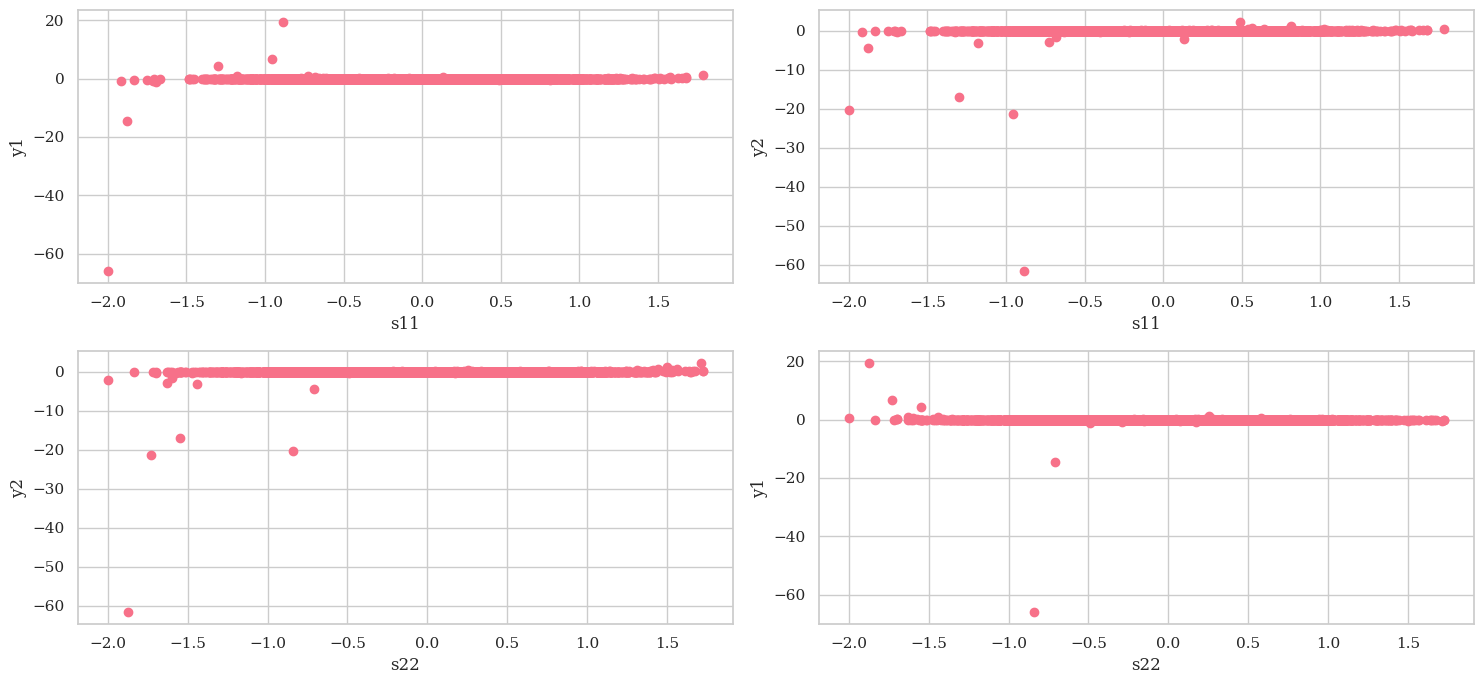

In [ ]:
W_matriz, y, X_white, J, cov = AMUSE(z1,1)

#plot da recuperação dos sinais

y1 = y[0,:].reshape(-1).tolist()
y2 = y[1,:].reshape(-1).tolist()

fig,ax = plt.subplots(2,2,figsize=(15,7))

ax[0][0].scatter(s11,y1)
ax[0][0].set_xlabel('s11')
ax[0][0].set_ylabel('y1')

ax[1][0].scatter(s22,y2)
ax[1][0].set_xlabel('s22')
ax[1][0].set_ylabel('y2')

ax[1][1].scatter(s22,y1)
ax[1][1].set_xlabel('s22')
ax[1][1].set_ylabel('y1')

ax[0][1].scatter(s11,y2)
ax[0][1].set_xlabel('s11')
ax[0][1].set_ylabel('y2')

plt.tight_layout()
plt.show()

In [ ]:
def cov_lag(x,tau):
  X_lag = x[:,:-tau] if tau != 0 else x[:,:]
  X_nolag = x[:,tau:]
  #calcula matriz de covariancia de atrasos
  cov = (1/(X_lag.shape[1]))*(np.dot(X_nolag,X_lag.T))
  #cov = np.cov(X_lag, rowvar=True, bias=True)

  return cov

In [ ]:
constantes_iniciais(np.array(X), 1, np.array([1,2,3,4]))

[matrix([[1],
         [2],
         [3],
         [4]]),
 matrix([[1],
         [2],
         [3],
         [4]])]

In [ ]:
def normaliza_w(w_matriz, ry):
  aux = []
  aux2 = []
  for i in range(0,np.shape(ry)[0]):
    ey = ry[i,i]
    #print(ey)
    w = np.divide(w_matriz[i,:],ey)
    #print(w.shape)
    aux.append(w)
    #print(aux)
  #print(np.shape(aux))
  W = np.array(aux)
  #print('tamanho',W.shape)
  return W


In [ ]:
A = [[1,2,3,4],[5,6,7,8]]

In [ ]:
# Função que retorna a atualização um vetor com a constantes atualizadas
# para multiplicação pela função gx, e em seguida obter z

def atualiza_constante(c,n_canal):
  aux = []
  k = 0
  s = []
  x = []
  X = []
  for linha in c:
    #Seguindo a restricao imposta para as constantes de g(x)
    # A primeira potencia x^1 não pode ser anulada, portanto, suas constantes
    #são fixas em 1
    soma = 0
    linha[0] = 1
    aux.append(linha)
    for valor in linha:
      #print(valor)
      soma = soma + np.abs(valor)
      #print(soma)
    s.append(soma)
  S = np.array(s)
  #print(S)
  C = np.array(aux)

  for i in range(0,n_canal):
    x.append(np.divide(C[i],S[i]))
  #print(x)


  #Transformando matrix canal x pot em vetor canal*pot
  for linha in x:
    linha[0] = 1
    for valor in linha:
      X.append(valor)
  X = np.array(X)
  return(X)


In [ ]:
atualiza_constante(A, 2)

array([1.        , 0.2       , 0.3       , 0.4       , 1.        ,
       0.27272727, 0.31818182, 0.36363636])

In [ ]:
# Função que retorna a multiplicação de gx por c
def multiplica_constante(c, gx):
  i = 0
  X_aux = []
  X = []
  tam = np.shape(gx)
  for j in gx:
    #print(j.shape)
    for k in j:
      aux = c[i]*k
      i = i +1
      X_aux.append(aux)
  X.append(X_aux)
  X = np.array(X)
  X = np.reshape(X,tam)
  return(X)


In [ ]:
multiplica_constante(atualiza_constante(A,2),gx1)

array([[[ 4.83699613e-01,  2.97163999e-01,  8.71844229e-02, ...,
          3.45011212e-01,  9.50605357e-02,  3.08030289e-01],
        [ 2.26337866e-02,  5.24829911e-03,  1.32539915e-04, ...,
          8.21352576e-03,  1.71803010e-04,  5.84534655e-03],
        [ 7.94328154e-03,  6.95187934e-04,  1.51117841e-06, ...,
          1.46651767e-03,  2.32874825e-06,  8.31933032e-04],
        [ 2.47793650e-03,  8.18527643e-05,  1.53155385e-08, ...,
          2.32751483e-04,  2.80583284e-08,  1.05248024e-04]],

       [[ 3.64099871e-01, -1.07850881e-01, -3.59881460e-01, ...,
          5.30511260e-01, -1.42483142e-01,  4.95661159e-01],
        [ 1.31640688e-02, -3.42136698e-04, -1.27117983e-02, ...,
          4.07204331e-02, -7.88894659e-04,  3.32110980e-02],
        [ 2.03600098e-03, -4.64294824e-06, -1.92075835e-03, ...,
          1.33705229e-02, -1.86849857e-05,  9.51918573e-03],
        [ 3.08468613e-04, -6.17210325e-08, -2.84304429e-04, ...,
          4.30060496e-03, -4.33522538e-07,  2.67276

In [ ]:
#Função que retorna a soma das gx's para encontra z(x), voltando ao tamanho
# original que seria canais x amostras

def soma_teste(x):
  #z = g_x(x,c)
  s = []
  for i in x:
    soma = 0
    for data in i:
      soma = soma + data
    s.append(soma)
  #print(np.shape(s))
  #print(s)
  return np.matrix(s)

In [ ]:
###### FUNCAO MISTURA_NAO_LINEAR TESTE USANDO CSI AO INVES DE Z(X) #######
# TENTATIVA DE AJUSTAR OS COEFICIENTES QUE MULTIPLICAM CSI PARA ENCONTRAR G(X)
# MATRIZ DE COEFICIENTES (CONSTANTE) DEVE TER TAMANHO CANAIS X B (Nº DE POTENCIAS - POT)

from random import random
import numpy as np
import random as rd
from scipy.signal import lfilter
import matplotlib.pyplot as plt
from scipy import linalg
from tqdm import tqdm

# Função não linear
# f=x^3, observacao do sinal x

def mistura_nao_linear(z, gx, pot):
  #Nao Linear
  #z é do tamanho canais x amostras
  mu = 0.05
  tau = 4
  C_aux = []
  for i in range(0,np.shape(z)[0]):
    c = np.array(pot*[1])
    C_aux.append(c)
  C = np.array(C_aux)
  #print(C.shape)
  n_samples = np.shape(z)[1]

  for b in tqdm(range(4,n_samples)):

    ############### PARTE LINEAR ####################

    #Calculo das matrizes de covariancia com atrasos
    #tau = 1
    W_matriz_1, y1, X_white_1, J1, cov1 = AMUSE(z,1)
    #print(J1.shape)
    #print(type(W_matriz_1))
    #print(y1.shape)
    #print(X_white_1.shape)
    #print(cov1.shape)

    #Matriz de covariancia
    Ry = (1/(y1.shape[1]))*(np.dot(y1,y1.T))
    #print(Ry.shape)
    #print(Ry[0,0])
    #Normalização dos pesos em W
    W = normaliza_w(W_matriz_1,Ry)

    y1 = W*np.matrix(X_white_1)
    #print(np.shape(np.matrix(X_white_1)))

    #J1 = normaliza_w(J1,Ry)
    ################## PARTE NAO LINEAR ##################

    #tau = 0
    cov0 = cov_lag(y1,0)
    #tau = 1
    cov1 = cov_lag(y1,1)
    #tau = 2
    cov2 = cov_lag(y1,2)
    #tau = 3
    cov3 = cov_lag(y1,3)

    Ry = np.concatenate([
        np.expand_dims(cov0,axis=2),
        np.expand_dims(cov1,axis=2),
        np.expand_dims(cov2,axis=2),
        np.expand_dims(cov3,axis=2)], axis=2)

    S = np.zeros([np.shape(z)[0],pot])
    grad = np.zeros([np.shape(z)[0],pot])

    #SOMATORIA DOS ATRASOS
    for t in range(0,tau):
      #a=t-1
      #PARA CADA MISTURA K
      for k in range(0,np.shape(z)[0]):
        #for p in range(0,pot):
        #PARA CADA AMOSTRA
        for i in range(0,np.shape(z)[0]):
          for j in range(0,np.shape(z)[0]):
            if i != j:
              #S = 2*Ry[i,j,t]
              S[k,:]= S[k,:] + (2*Ry[i,j,t]) * (gx[k,:,b]*J1[i,k]*y1[j,(b-t)]
                                              + gx[k,:,(b-t)]*J1[j,k]*y1[i,b])

      grad = grad + S[:,:]

      #print((mu*grad).shape)

    C = C - mu*(grad)

    c = atualiza_constante(C,np.shape(z)[0])
    gx_c = multiplica_constante(c, gx)

    z = soma_teste(gx_c)

    #CC[:,b]=[C[0,:].T]

    # Recuperacao de Z
    #z_result = z
  return y1

 #   CC(:,b)=[C(1,:)'];


In [ ]:
y1 = mistura_nao_linear(z1, gx1, b)

  1%|          | 40/4996 [00:00<00:24, 199.90it/s]


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 5.639932965095795e-14 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 5.5289106626332796e-14 


loss_ICA = 4.8405723873656825e-14 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 4.75175454539567e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 4.729550084903167e-14 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 3.064215547965432e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 3.730349362740526e-14 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 9.3

  1%|          | 61/4996 [00:00<00:24, 203.56it/s]


loss_ICA = 2.708944180085382e-14 


loss_ICA = 6.8833827526759706e-15 


loss_ICA = 5.417888360170764e-14 


loss_ICA = 5.5067062021407764e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 2.7755575615628914e-14 


loss_ICA = 9.325873406851315e-15 


loss_ICA = 1.5765166949677223e-14 


loss_ICA = 0.0 


loss_ICA = 4.8405723873656825e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 5.551115123125783e-15 


loss_ICA = 1.5543122344752192e-15 


loss_ICA = 0.0 


loss_ICA = 1.9761969838327786e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 4.440892098500626e-14 


loss_ICA = 7.37188088351104e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 1.82

  2%|▏         | 102/4996 [00:00<00:24, 196.35it/s]


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 9.325873406851315e-15 


loss_ICA = 3.375077994860476e-14 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 3.730349362740526e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 3.6415315207705135e-14 


loss_ICA = 9.325873406851315e-15 


loss_ICA = 2.708944180085382e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 8.659739592076221e-15 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 5.995204332975845e-15 


loss_ICA = 1.9984014443252818e-15 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 5.551115123125783e-15 


loss_ICA = 1.5

  3%|▎         | 143/4996 [00:00<00:24, 195.59it/s]


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 2.0650148258027912e-14 


loss_ICA = 4.529709940470639e-14 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 4.085620730620576e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 4.440892098500626e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 4.796163466380676e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 1.7985612998927536e-14 


loss_ICA = 5.0182080713057076e-14 


loss_ICA = 9.992007221626409e-15 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 5.5067062021407764e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 5.284661597215745e-14 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 1.065

  4%|▎         | 186/4996 [00:00<00:23, 203.07it/s]


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 2.55351295663786e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 3.1308289294429414e-14 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 3.375077994860476e-14 


loss_ICA = 1.0436096431476471e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 3.708144902248023e-14 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 3.6415315207705135e-14 


loss_ICA = 1.3322676295501878e-15 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 1.3322676295501878e-15 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 1.2656542480726785e-14 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 1.

  5%|▍         | 229/4996 [00:01<00:23, 203.59it/s]


loss_ICA = 5.995204332975845e-15 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 3.375077994860476e-14 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 3.219646771412954e-14 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 1.709743457922741e-14 


loss_ICA = 1.2212453270876722e-14 


loss_ICA = 4.1744385725905886e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 1.3322676295501878e-15 


loss_ICA = 3.7969627442180354e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 3.3084646133829665e-14 


loss_ICA = 3.597122599785507e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 1.9984014443252818e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 

  5%|▌         | 272/4996 [00:01<00:22, 206.11it/s]


loss_ICA = 1.1324274851176597e-14 


loss_ICA = 5.10702591327572e-15 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 1.84297022087776e-14 


loss_ICA = 4.263256414560601e-14 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 0.0 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 4.75175454539567e-14 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 2.7755575615628914e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 9.992007221626409e-15 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 2.220446049250313e-15 



  6%|▋         | 316/4996 [00:01<00:22, 210.11it/s]

2.2648549702353193e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 1.6653345369377348e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 1.887379141862766e-14 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 2.8199664825478976e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 4.1300296516055823e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 2.731148640577885e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 3.5971225997855

  7%|▋         | 372/4996 [00:01<00:18, 244.87it/s]


loss_ICA = 4.418687638008123e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 9.992007221626409e-15 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 7.194245199571014e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 4.1744385725905886e-14 


loss_ICA = 3.5083047578154947e-14 


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 5.062616992290714e-14 


loss_ICA = 4.440892098500626e-14 


loss_ICA = 9.32

  9%|▊         | 428/4996 [00:01<00:17, 259.45it/s]


loss_ICA = 5.329070518200751e-15 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 2.1760371282653068e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 1.3100631690576847e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 1.4654943925052066e-14 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 3.064215547965432e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 1

 10%|▉         | 482/4996 [00:02<00:17, 261.79it/s]


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 1.532107773982716e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 3.68594044175552e-14 


loss_ICA = 3.5083047578154947e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 2.886579864025407e-15 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 1.0880185641326534e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 2.220446049250313e-16 


loss_ICA = 1.5765166949677223e-14 


loss_ICA = 1.6209256159527285e-14 


loss_ICA = 5.639932965095795e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 2.708944180085382e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 4.4

 11%|█         | 540/4996 [00:02<00:16, 264.09it/s]


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 3.352873534367973e-14 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 3.730349362740526e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 3.241851231905457e-14 


loss_ICA = 4.4853010194856324e-14 


loss_ICA = 2.9753977059954195e-14 


loss_ICA = 2.9753977059954195e-14 


loss_ICA = 4.04121180963557e-14 


loss_ICA = 4.374278717023117e-14 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 4.6629367034256575e-15 


loss_ICA = 2.0650148258027912e-14 


loss_ICA = 1.176836406102666e-14 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 5.750955267558311e-14 


loss_ICA = 4.929390229335695e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 3.064215547965432e-14 


loss_ICA = 4.1744385725905886e-14 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 3.8

 12%|█▏        | 593/4996 [00:02<00:17, 257.98it/s]


loss_ICA = 6.128431095930864e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 3.730349362740526e-14 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 1.5543122344752192e-15 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 6.439293542825908e-15 


loss_ICA = 9.325873406851315e-15 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 5.417888360170764e-14 


loss_ICA = 2.9531932455029164e-14 


loss_ICA = 3.9745984281580604e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 3.2862601528

 13%|█▎        | 648/4996 [00:02<00:16, 264.86it/s]


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 3.1530333899354446e-14 


loss_ICA = 4.707345624410664e-14 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 5.062616992290714e-14 


loss_ICA = 4.973799150320701e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 2.5091040356528538e-14 


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 3.574918139293004e-14 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 3.064215547965432e-14 


loss_ICA = 1.4654943925052066e-14 


loss_ICA = 1.9984014443252818e-14 


loss_ICA = 1.709743457922741e-14 


loss_ICA = 3.930189507173054e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 3.086420008457935e-14 


loss_ICA = 3.3306690738754696e-14 


loss_ICA = 4.707345

 14%|█▍        | 706/4996 [00:03<00:15, 274.68it/s]


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 3.419486915845482e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 5.129230373768223e-14 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 1.9984014443252818e-14 


loss_ICA = 1.3322676295501878e-15 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 4.796163466380676e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 1.1

 15%|█▌        | 762/4996 [00:03<00:15, 266.03it/s]




loss_ICA = 1.176836406102666e-14 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 2.886579864025407e-15 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 3.8191672047105385e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 2.531308496145357e-14 


loss_ICA = 4.1744385725905886e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 4.529709940470639e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 3.5083047578154947e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 

 16%|█▋        | 820/4996 [00:03<00:15, 273.36it/s]


loss_ICA = 0.0 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 4.707345624410664e-14 


loss_ICA = 4.618527782440651e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 3.8191672047105385e-14 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 2.4646951146678475e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 3.68594044175552e-14 


loss_ICA = 9.325873406851315e-15 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 2.1760371282653068e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 1.199040866595169e-14 



 18%|█▊        | 880/4996 [00:03<00:14, 283.36it/s]


loss_ICA = 7.549516567451064e-15 


loss_ICA = 4.6629367034256575e-15 


loss_ICA = 5.10702591327572e-15 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 6.039613253960852e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 4.5075054799781356e-14 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 6.8833827526759706e-15 


loss_ICA = 2.4202861936828413e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 4.796163466380676e-14 


loss_ICA = 1.2

 19%|█▉        | 938/4996 [00:03<00:14, 278.15it/s]


loss_ICA = 2.398081733190338e-14 


loss_ICA = 2.19824158875781e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 4.884981308350689e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 4.6629367034256575e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 4.4853010194856324e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 6.039613253960852e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 3.1530333899354446e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 0.0 


loss_ICA = 5.773159728050814e-15 




 20%|█▉        | 995/4996 [00:04<00:14, 278.56it/s]


loss_ICA = 7.105427357601002e-15 


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 2.4424906541753444e-15 


loss_ICA = 1.2212453270876722e-14 


loss_ICA = 5.728750807065808e-14 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 2.2870594307278225e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 1.4654943925052066e-14 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 2.531308496145357e-14 


loss_ICA = 1.887379141862766e-14 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 2.1538326677728037e-14 


loss_ICA = 4.6629367034256575e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA =

 21%|██        | 1053/4996 [00:04<00:14, 272.72it/s]


loss_ICA = 2.2870594307278225e-14 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 0.0 


loss_ICA = 1.354472090042691e-14 


loss_ICA = 1.9984014443252818e-15 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 8.215650382226158e-15 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 2.4646951146678475e-14 


loss_ICA = 4.1522341120980855e-14 


loss_ICA = 8.215650382226158e-15 


loss_ICA = 1.709743457922741e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 6.439293542825908e-14 


loss_ICA = 1.0880185641326534e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 4.39648317751562e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 8.881784197001252e-15 




 22%|██▏       | 1112/4996 [00:04<00:13, 281.10it/s]




loss_ICA = 6.8833827526759706e-15 


loss_ICA = 4.884981308350689e-14 


loss_ICA = 2.9753977059954195e-14 


loss_ICA = 1.9984014443252818e-15 


loss_ICA = 3.3306690738754696e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 3.3306690738754696e-14 


loss_ICA = 4.218847493575595e-14 


loss_ICA = 9.992007221626409e-15 


loss_ICA = 3.419486915845482e-14 


loss_ICA = 4.3076653355456074e-14 


loss_ICA = 3.8191672047105385e-14 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 1.4654943925052066e-14 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 3.774758283725532e-14 


loss_ICA = 2.9753977059954195e-14 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 2.7977620220553945e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 1.9984014443252818e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 3

 23%|██▎       | 1171/4996 [00:04<00:13, 280.95it/s]


loss_ICA = 4.440892098500626e-16 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 5.795364188543317e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 5.5067062021407764e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 5.684341886080802e-14 


loss_ICA = 4.440892098500626e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 4.1300296516055823e-14 


loss_ICA = 2.7977620220553945e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 2.5757174171303632e-14 


loss_ICA 

 25%|██▍       | 1230/4996 [00:04<00:13, 285.67it/s]


loss_ICA = 2.19824158875781e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 2.220446049250313e-16 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 1.7985612998927536e-14 


loss_ICA = 5.040412531798211e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 3.8191672047105385e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 4.263256414560601e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 4.1300296516055823e-14 


loss_ICA = 3.

 26%|██▌       | 1288/4996 [00:05<00:13, 281.47it/s]


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 3.419486915845482e-14 


loss_ICA = 4.0190073491430667e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 5.5067062021407764e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 3.419486915845482e-14 


loss_ICA = 4.39

 27%|██▋       | 1346/4996 [00:05<00:13, 276.01it/s]

 


loss_ICA = 4.929390229335695e-14 


loss_ICA = 2.2426505097428162e-14 


loss_ICA = 4.263256414560601e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 6.483702463810914e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 2.3314683517128287e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 2.708944180085382e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 5.595524044110789e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 5.284661597215745e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 5.5067062021407764e-14 


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 1

 28%|██▊       | 1402/4996 [00:05<00:13, 274.75it/s]


loss_ICA = 2.886579864025407e-15 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 1.5543122344752192e-15 


loss_ICA = 3.730349362740526e-14 


loss_ICA = 8.215650382226158e-15 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 2.9531932455029164e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 4.1300296516055823e-14 


loss_ICA = 3.8191672047105385e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 1.7985612998927536e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 1.2656542480726785e-14 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 4.0190073491430667e-14 


loss_ICA = 1.5543122344752192e-15 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.5979218776228663e-14 


loss_ICA = 3.064215547965432e-14 


loss_ICA = 4.085620730620576e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 7.

 29%|██▉       | 1458/4996 [00:05<00:13, 271.21it/s]


loss_ICA = 6.661338147750939e-15 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 3.8191672047105385e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 4.707345624410664e-14 


loss_ICA = 1.3100631690576847e-14 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 5.5067062021407764e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 1.4654943925052066e-14 


loss_ICA = 1.4432899320127035e-14 


loss_ICA = 1.9984014443252818e-15 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 6

 30%|███       | 1514/4996 [00:05<00:13, 265.69it/s]

 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 1.4654943925052066e-14 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 1.532107773982716e-14 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 2.7977620220553945e-14 


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 4.263256414560601e-14 


loss_ICA = 4.1300296516055823e-14 


loss_ICA = 3.375077994860476e-14 


loss_ICA = 1.6653345369377348e-14 


loss_ICA = 1.9984014443252818e-14 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 4.884981308350689e-14 


loss_ICA =

 31%|███▏      | 1569/4996 [00:06<00:12, 266.73it/s]


loss_ICA = 8.659739592076221e-15 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 4.973799150320701e-14 


loss_ICA = 4.263256414560601e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 3.5083047578154947e-14 


loss_ICA = 5.284661597215745e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 4.04121180963557e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 2.9753977059954195e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 2.9976021664879227e-14 


loss_ICA = 1.509

 33%|███▎      | 1624/4996 [00:06<00:12, 267.39it/s]


loss_ICA = 4.75175454539567e-14 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 2.531308496145357e-14 


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 5.617728504603292e-14 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 4.440892098500626e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 1.9317880628477724e-14 


loss_ICA = 2.0650148258027912e-14 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 1.6209256159527285e-14 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 3.375077994860476e-14 


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 2.375877272697835e-14 


loss_ICA = 2.886579864025407e-15 


loss_ICA = 2.6645

 34%|███▎      | 1680/4996 [00:06<00:12, 270.66it/s]

 


loss_ICA = 4.085620730620576e-14 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 3.907985046680551e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 4.263256414560601e-14 


loss_ICA = 3.3306690738754696e-15 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 5.417888360170764e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 4.440892098500626e-14 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 1.532107773982716e-14 


loss_ICA = 3.907985046680551e-14 


loss_ICA = 3.730349362740526e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 1.9984014443252818e-14 


loss_ICA = 3.774758283725532e-15 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 

 35%|███▍      | 1740/4996 [00:06<00:11, 281.91it/s]

 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 2.1760371282653068e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 2.1094237467877974e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 1.9984014443252818e-15 


loss_ICA = 6.439293542825908e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 3.352873534367973e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 1.0436096431476471e-14 


loss_ICA = 4.085620730620576e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 5.1514348342607263e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 1.9761969838327786e-14 


loss_ICA = 3.6415315207705135e-14 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 1.

 36%|███▌      | 1798/4996 [00:06<00:11, 277.18it/s]


loss_ICA = 4.4853010194856324e-14 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 3.730349362740526e-14 


loss_ICA = 1.709743457922741e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 5.684341886080802e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 5.551115123125783e-15 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 3.774758283725532e-15 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 1.709743457922741e-14 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 1.9761969838327786e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 9.76996

 37%|███▋      | 1855/4996 [00:07<00:11, 277.73it/s]


loss_ICA = 6.661338147750939e-16 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 4.1300296516055823e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 1.6653345369377348e-14 


loss_ICA = 1.3100631690576847e-14 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 4.973799150320701e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 3.3306690738754696e-15 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.3322676295501878e-15 


loss_ICA =

 38%|███▊      | 1913/4996 [00:07<00:10, 281.63it/s]




loss_ICA = 4.973799150320701e-14 


loss_ICA = 9.547918011776346e-15 


loss_ICA = 2.020605904817785e-14 


loss_ICA = 6.838973831690964e-14 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 5.639932965095795e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 1.3322676295501878e-15 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 9.992007221626409e-15 


loss_ICA = 2.1760371282653068e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 5.284661597215745e-14 


loss_ICA = 6.17284001691587e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 4.44089

 39%|███▉      | 1972/4996 [00:07<00:10, 279.84it/s]


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 4.884981308350689e-14 


loss_ICA = 3.930189507173054e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 4.574118861455645e-14 


loss_ICA = 5.551115123125783e-15 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 1.9984014443252818e-14 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 1.3322676295501878e-15 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 1.709743457922741e-14 


loss_ICA = 4.285460875053104e-14 


loss_ICA = 1.5987

 41%|████      | 2031/4996 [00:07<00:10, 279.91it/s]


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 4.1744385725905886e-14 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 4.085620730620576e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 2.708944180085382e-14 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 5.10702591327572e-14 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 5.10702591327572e-15 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 3.730349362740526e-14 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 2.4646951146678475e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.19

 42%|████▏     | 2089/4996 [00:08<00:10, 281.74it/s]


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 4.440892098500626e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 2.1760371282653068e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 0.0 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 5.839773109528323e-14 


loss_ICA = 3.375077994860476e-14 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 2.864375403532904e-14 


loss_ICA = 4.574118861455645e-14 


loss_ICA = 6.439293542825908e-15 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 2.6867397195928788e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 6.217248937900877e-14 




 43%|████▎     | 2148/4996 [00:08<00:10, 284.76it/s]


loss_ICA = 7.105427357601002e-15 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 1.9984014443252818e-14 


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 2.708944180085382e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 1.354472090042691e-14 


loss_ICA = 1.3322676295501878e-15 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 4.618527782440651e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.9753977059954195e-14 


loss_ICA = 2.9753977059954195e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 4.6629367034256575e-15 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 3.907985046680551e-14 


loss_ICA = 8.88

 44%|████▎     | 2177/4996 [00:08<00:10, 277.13it/s]

 2.3092638912203256e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 4.1744385725905886e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 3.8191672047105385e-14 


loss_ICA = 3.68594044175552e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 5.595524044110789e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 9.103828801926284e-15 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 6.816769371198461e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 7.9936057773

 45%|████▍     | 2239/4996 [00:08<00:09, 284.78it/s]



loss_ICA = 2.5091040356528538e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 4.440892098500626e-14 


loss_ICA = 1.7985612998927536e-14 


loss_ICA = 4.707345624410664e-14 


loss_ICA = 6.661338147750939e-16 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 1.176836406102666e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 4.085620730620576e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 3.952393967665557e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 2.7977620220553945e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 4.707

 46%|████▌     | 2298/4996 [00:08<00:09, 286.09it/s]


loss_ICA = 2.1538326677728037e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 2.6423307986078726e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 3.419486915845482e-14 


loss_ICA = 2.19824158875781e-14 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 3.774758283725532e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 2.220446049250313e-16 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.9976021664879227e-14 


loss_ICA = 1.7541523789077473e-14 


loss_ICA = 2.7977620220553945e-14 


loss_ICA = 3.685940

 47%|████▋     | 2356/4996 [00:08<00:09, 282.37it/s]


loss_ICA = 4.929390229335695e-14 


loss_ICA = 4.8627768478581856e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 9.103828801926284e-15 


loss_ICA = 2.3314683517128287e-14 


loss_ICA = 3.064215547965432e-14 


loss_ICA = 1.354472090042691e-14 


loss_ICA = 4.085620730620576e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 4.04121180963557e-14 


loss_ICA = 9.103828801926284e-15 


loss_ICA = 4.39648317751562e-14 


loss_ICA = 3.1530333899354446e-14 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 1.1102230246251565e-15 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 2.5091040356528538e-14 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 7.99

 48%|████▊     | 2414/4996 [00:09<00:09, 278.81it/s]


loss_ICA = 2.7977620220553945e-14 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 4.6629367034256575e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 1.3322676295501878e-15 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 0.0 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 1.2656542480726785e-14 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 4.218847493575595e-14 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 2.7977620220553945e-14 


loss_ICA = 6.661338147750939e-16 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 5.573319583618286e-14 

 49%|████▉     | 2472/4996 [00:09<00:09, 278.56it/s]


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 4.6629367034256575e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 3.730349362740526e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 3.774758283725532e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 7.771561172376096e-15 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 4.1744385725905886e-14 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 3

 51%|█████     | 2531/4996 [00:09<00:08, 286.28it/s]


loss_ICA = 5.1736392947532295e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 5.88418203051333e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 6.661338147750939e-16 


loss_ICA = 3.064215547965432e-14 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 4.218847493575595e-15 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 3.863576125695545e-14 


loss_ICA = 2.531308496145357e-14 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 2.4424906541753444e-15 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 1.4654943925052066e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 3.730349362740526e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 2.3536

 52%|█████▏    | 2590/4996 [00:09<00:08, 285.56it/s]

 6.17284001691587e-14 


loss_ICA = 5.995204332975845e-15 


loss_ICA = 6.128431095930864e-14 


loss_ICA = 5.995204332975845e-15 


loss_ICA = 5.906386491005833e-14 


loss_ICA = 5.773159728050814e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 2.4646951146678475e-14 


loss_ICA = 9.325873406851315e-15 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 5.906386491005833e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 4.440892098500626e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 1.1324274851176597e-14 


loss_ICA = 5.3290705182007514e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 5.595524044110789e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 1.865174681370263e-14 

 53%|█████▎    | 2647/4996 [00:10<00:08, 274.64it/s]


loss_ICA = 4.707345624410664e-14 


loss_ICA = 1.5543122344752192e-15 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 9.103828801926284e-15 


loss_ICA = 2.2426505097428162e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 4.707345624410664e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 6.461498003318411e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 1.887379141862766e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 4.418687638008123e-14 


loss_ICA = 4.796163466380676e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 1.776

 54%|█████▍    | 2703/4996 [00:10<00:08, 271.58it/s]


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 6.8833827526759706e-15 


loss_ICA = 3.397282455352979e-14 


loss_ICA = 5.0182080713057076e-14 


loss_ICA = 4.218847493575595e-15 


loss_ICA = 5.240252676230739e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 4.0190073491430667e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 1.887379141862766e-14 


loss_ICA = 4.618527782440651e-14 


loss_ICA = 

 55%|█████▌    | 2760/4996 [00:10<00:08, 273.43it/s]


loss_ICA = 7.105427357601002e-15 


loss_ICA = 2.531308496145357e-14 


loss_ICA = 4.75175454539567e-14 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 3.574918139293004e-14 


loss_ICA = 4.929390229335695e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 9.325873406851315e-15 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 5.5067062021407764e-14 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 6.927791673660977e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 6.59472476627343e-14 


loss_ICA = 2.886579864025407e-15 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 4.285460875053104e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 3.5083047578154947e-14 


loss_ICA = 1.776356839

 56%|█████▋    | 2815/4996 [00:10<00:08, 268.94it/s]


loss_ICA = 4.085620730620576e-14 


loss_ICA = 1.3100631690576847e-14 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 4.1744385725905886e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 5.551115123125783e-15 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 1.9984014443252818e-14 


loss_ICA = 3.597122599785507e-14 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 6.106226635438361e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 1.4654943925052066e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 1.9317880628477724e-14 


loss_ICA

 57%|█████▋    | 2872/4996 [00:10<00:07, 274.01it/s]

 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 4.218847493575595e-14 


loss_ICA = 5.861977570020827e-14 


loss_ICA = 4.1300296516055823e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 2.9753977059954195e-14 


loss_ICA = 5.684341886080802e-14 


loss_ICA = 4.04121180963557e-14 


loss_ICA = 4.796163466380676e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 1.0436096431476471e-14 


loss_ICA = 2.531308496145357e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 1.3988810110276972e-14 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 9.992007221626409e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 1.8

 59%|█████▊    | 2931/4996 [00:11<00:07, 279.37it/s]


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.7977620220553945e-14 


loss_ICA = 4.529709940470639e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 3.219646771412954e-14 


loss_ICA = 3.1530333899354446e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 5.417888360170764e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 

 60%|█████▉    | 2989/4996 [00:11<00:07, 278.39it/s]


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 5.861977570020827e-14 


loss_ICA = 1.2656542480726785e-14 


loss_ICA = 1.1102230246251565e-15 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 1.4654943925052066e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 5.950795411990839e-14 


loss_ICA = 3.730349362740526e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 4.4853010194856324e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 4.440892098500626e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 4.218847493575595e-14 


loss_ICA = 6.883

 61%|██████    | 3045/4996 [00:11<00:07, 272.43it/s]


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 8.659739592076221e-15 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 2.19824158875781e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 0.0 


loss_ICA = 3.5083047578154947e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 5.995204332975845e-15 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 4.973799150320701e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 8.659739592076221e-15 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 1.5765166949677223e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 4.440892098500626e-16 



 62%|██████▏   | 3100/4996 [00:11<00:07, 245.79it/s]

 8.43769498715119e-15 


loss_ICA = 4.884981308350689e-14 


loss_ICA = 1.1324274851176597e-14 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 3.68594044175552e-14 


loss_ICA = 3.1530333899354446e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.708944180085382e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 1.9984014443252818e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 3.419486915845482e-14 


loss_ICA = 2.8199664825478976e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.3314683517128287e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 6.17284001691587e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 3.241851231905457e-

 63%|██████▎   | 3149/4996 [00:11<00:08, 224.82it/s]



loss_ICA = 3.2862601528904634e-14 


loss_ICA = 6.306066779870889e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 2.7977620220553945e-14 


loss_ICA = 3.375077994860476e-14 


loss_ICA = 3.530509218307998e-14 


loss_ICA = 9.103828801926284e-15 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.84297022087776e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 3.930189507173054e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 2.19824158875781e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 9.325873406851315e-15 


loss_ICA = 2.66453

 64%|██████▍   | 3195/4996 [00:12<00:08, 219.32it/s]


loss_ICA = 4.796163466380676e-14 


loss_ICA = 4.884981308350689e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 4.6629367034256575e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 1.7985612998927536e-14 


loss_ICA = 4.796163466380676e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 3.68594044175552e-14 


loss_ICA = 3.1530333899354446e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 1.354472090042691e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 2.8199664825478976e-14 


loss_ICA = 3.8191672047105385e-14 


loss_ICA = 2.1760371282653068e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 5.329

 64%|██████▍   | 3217/4996 [00:12<00:08, 216.76it/s]


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 3.574918139293004e-14 


loss_ICA = 1.2212453270876722e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 2.708944180085382e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 4.618527782440651e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 1.3988810110276972e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 4.418687638008123e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 0.0 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 9.325873406851315e-15 


loss_ICA = 3.6415315207705135e-14 


loss_ICA = 4.574118861455645e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 3.419486915845482e-1

 65%|██████▍   | 3239/4996 [00:12<00:09, 188.11it/s]

 1.509903313490213e-14 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 2.708944180085382e-14 


loss_ICA = 1.354472090042691e-14 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 5.262457136723242e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 2.4646951146678475e-14 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 1.4210854715202004e-14 



 65%|██████▌   | 3259/4996 [00:12<00:18, 94.98it/s] 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 4.085620730620576e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 3.375077994860476e-14 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 6.439293542825908e-15 


loss_ICA = 7.771561172376096e-15 


loss_ICA = 3.8413716652030416e-14 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 2.708944180085382e-14 



 66%|██████▌   | 3274/4996 [00:13<00:19, 89.89it/s]


loss_ICA = 5.3734794391857577e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 1.9317880628477724e-14 


loss_ICA = 1.9984014443252818e-15 


loss_ICA = 4.6629367034256575e-14 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 3.597122599785507e-14 


loss_ICA = 3.774758283725532e-15 


loss_ICA = 3.907985046680551e-14 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 1.9984014443252818e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA =

 66%|██████▌   | 3299/4996 [00:13<00:20, 83.90it/s]

 5.773159728050814e-15 


loss_ICA = 4.218847493575595e-14 


loss_ICA = 4.440892098500626e-14 


loss_ICA = 5.773159728050814e-14 


loss_ICA = 2.708944180085382e-14 


loss_ICA = 4.263256414560601e-14 


loss_ICA = 1.7541523789077473e-14 


loss_ICA = 2.1760371282653068e-14 


loss_ICA = 1.176836406102666e-14 


loss_ICA = 3.375077994860476e-14 


loss_ICA = 4.618527782440651e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 9.769962616701378e-15 


loss_ICA =

 66%|██████▋   | 3310/4996 [00:13<00:20, 82.86it/s]

 1.3322676295501878e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 1.4654943925052066e-14 


loss_ICA = 4.796163466380676e-14 


loss_ICA = 3.086420008457935e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 4.796163466380676e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 4.796163466380676e-14 



 67%|██████▋   | 3330/4996 [00:13<00:19, 84.98it/s]


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 1.9984014443252818e-14 


loss_ICA = 4.5075054799781356e-14 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 6.88338275267597e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 4.618527782440651e-14 


loss_ICA = 4.729550084903167e-14 


loss_ICA = 4.3076653355456074e-14 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 2.708944180085382e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 1.2212453270876722e-14 



 67%|██████▋   | 3340/4996 [00:13<00:20, 82.61it/s]


loss_ICA = 2.220446049250313e-15 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 3.774758283725532e-14 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 3.907985046680551e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 1.2212453270876722e-14 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 3.175237850427948e-14 


loss_ICA = 5.329070518200751e-15 



 67%|██████▋   | 3358/4996 [00:14<00:21, 77.47it/s]


loss_ICA = 7.904787935331115e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 5.10702591327572e-15 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 2.886579864025407e-15 


loss_ICA = 5.417888360170764e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 8.659739592076221e-15 


loss_ICA =

 68%|██████▊   | 3373/4996 [00:14<00:24, 67.48it/s]

 3.552713678800501e-15 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 1.709743457922741e-14 


loss_ICA = 1.84297022087776e-14 


loss_ICA = 1.6653345369377348e-14 


loss_ICA = 1.6209256159527285e-14 


loss_ICA = 0.0 


loss_ICA = 1.7319479184152442e-14 



 68%|██████▊   | 3393/4996 [00:14<00:19, 80.99it/s]


loss_ICA = 2.220446049250313e-15 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 2.1760371282653068e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 3.6637359812630166e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 2.531308496145357e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 1.5765166949677223e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA =

 68%|██████▊   | 3414/4996 [00:14<00:17, 88.59it/s]

 7.105427357601002e-15 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 2.9753977059954195e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 8.659739592076221e-15 


loss_ICA = 2.55351295663786e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 6.084022174945858e-14 


loss_ICA = 5.5067062021407764e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 5.329070518200751e-15 



 69%|██████▊   | 3424/4996 [00:15<00:20, 78.01it/s]


loss_ICA = 5.795364188543317e-14 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 3.241851231905457e-14 


loss_ICA = 2.4424906541753444e-15 


loss_ICA = 2.2426505097428162e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 2.220446049250313e-16 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 4.6629367034256575e-15 


loss_ICA = 7.993605777301127e-15 



 69%|██████▊   | 3433/4996 [00:15<00:20, 75.21it/s]


loss_ICA = 6.217248937900877e-15 


loss_ICA = 5.3734794391857577e-14 


loss_ICA = 8.659739592076221e-15 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 2.1760371282653068e-14 


loss_ICA = 1.9761969838327786e-14 


loss_ICA = 2.1760371282653068e-14 


loss_ICA = 6.661338147750939e-15 



 69%|██████▉   | 3448/4996 [00:15<00:26, 57.93it/s]


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 6.128431095930864e-14 


loss_ICA = 4.4853010194856324e-14 


loss_ICA = 1.5987211554602254e-14 



 69%|██████▉   | 3455/4996 [00:15<00:30, 50.12it/s]


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 2.9753977059954195e-14 


loss_ICA = 3.68594044175552e-14 


loss_ICA =

 69%|██████▉   | 3461/4996 [00:15<00:33, 46.37it/s]

 9.325873406851315e-15 


loss_ICA = 3.1530333899354446e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 3.574918139293004e-14 


loss_ICA = 4.085620730620576e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 3.26405569239796e-14 


loss_ICA = 2.398081733190338e-14 



 70%|██████▉   | 3482/4996 [00:16<00:26, 57.30it/s]


loss_ICA = 3.552713678800501e-15 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 9.547918011776346e-15 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 3.8191672047105385e-14 


loss_ICA = 2.2426505097428162e-14 


loss_ICA = 1.354472090042691e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 3.9968028886505635e-15 


 70%|███████   | 3501/4996 [00:16<00:20, 72.01it/s]



loss_ICA = 7.771561172376096e-15 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 4.196643033083092e-14 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 4.884981308350689e-14 


loss_ICA = 6.750155989720952e-14 


loss_ICA = 1.6653345369377348e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 5.684341886080802e-14 


loss_ICA = 3.8191672047105385e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 4.618527782440651e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 2.042810365310288e-14 


loss_ICA =

 70%|███████   | 3509/4996 [00:16<00:20, 72.95it/s]

 3.3084646133829665e-14 


loss_ICA = 4.596323321948148e-14 


loss_ICA = 3.6415315207705135e-14 


loss_ICA = 1.4654943925052066e-14 


loss_ICA = 3.774758283725532e-15 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 4.618527782440651e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 2.4868995751603507e-14 



 71%|███████   | 3525/4996 [00:16<00:20, 71.28it/s]


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 3.5083047578154947e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 9.325873406851315e-15 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 5.062616992290714e-14 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.887379141862766e-14 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA =

 71%|███████   | 3544/4996 [00:16<00:18, 79.87it/s]

 2.5757174171303632e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 4.04121180963557e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 6.572520305780927e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 1.4654943925052066e-14 


loss_ICA = 4.884981308350689e-14 


loss_ICA = 3.907985046680551e-14 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 1.9539925233402755e-14 



 71%|███████▏  | 3561/4996 [00:17<00:19, 74.43it/s]


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 5.5067062021407764e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 5.10702591327572e-15 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA =

 72%|███████▏  | 3579/4996 [00:17<00:17, 78.85it/s]

 2.531308496145357e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 1.3100631690576847e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 5.084821452783217e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 1.0436096431476471e-14 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 4.6629367034256575e-15 


loss_ICA = 2.708944180085382e-14 


loss_ICA = 1.4654943925052066e-14 


loss_ICA = 1.7541523789077473e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 3.019806626980426e-14 



 72%|███████▏  | 3602/4996 [00:17<00:14, 94.69it/s]


loss_ICA = 6.217248937900877e-15 


loss_ICA = 4.1744385725905886e-14 


loss_ICA = 5.995204332975845e-15 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 3.3306690738754696e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.531308496145357e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 4.085620730620576e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 9.325873406851315e-15 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 5.3290705182007514e-14 


loss_ICA = 2.7755575615628914e-14 


loss_ICA = 2.55351295663786e-14 


loss_ICA = 2.7977620220553945e-14 



 72%|███████▏  | 3613/4996 [00:17<00:14, 96.03it/s]


loss_ICA = 3.597122599785507e-14 


loss_ICA = 4.1744385725905886e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 5.417888360170764e-14 


loss_ICA = 1.532107773982716e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 6.483702463810914e-14 


loss_ICA = 1.7541523789077473e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 2.5757174171303632e-14 



 73%|███████▎  | 3633/4996 [00:18<00:17, 77.39it/s]


loss_ICA = 4.8405723873656825e-14 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 7.616129948928574e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 1.2656542480726785e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 2.1094237467877974e-14 


loss_ICA = 7.993605777301127e-15 



 73%|███████▎  | 3652/4996 [00:18<00:16, 82.40it/s]


loss_ICA = 1.687538997430238e-14 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 3.5083047578154947e-14 


loss_ICA = 3.6415315207705135e-14 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 5.3734794391857577e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 5.240252676230739e-14 


loss_ICA = 3.6415315207705135e-14 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 4.440892098500626e-14 


loss_ICA = 4.529709940470639e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 1.021405182655144e-14 



 73%|███████▎  | 3670/4996 [00:18<00:16, 81.02it/s]


loss_ICA = 5.240252676230739e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 5.995204332975845e-15 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 3.863576125695545e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 6.661338147750939e-16 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 3.730349362740526e-14 


loss_ICA = 7.105427357601002e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 3.1086244689504383e-15 


loss_ICA =

 74%|███████▎  | 3679/4996 [00:18<00:18, 71.56it/s]

 3.4638958368304884e-14 


loss_ICA = 1.5765166949677223e-14 


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 3.375077994860476e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA =

 74%|███████▍  | 3699/4996 [00:18<00:16, 78.90it/s]

 1.1546319456101628e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 2.6423307986078726e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 6.550315845288424e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 7.549516567451064e-15 



 74%|███████▍  | 3717/4996 [00:19<00:15, 80.64it/s]


loss_ICA = 2.398081733190338e-14 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 3.5083047578154947e-14 


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 4.884981308350689e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 1.532107773982716e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 3.952393967665557e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 3.4638958368304884e-14 



 75%|███████▍  | 3726/4996 [00:19<00:16, 76.53it/s]


loss_ICA = 5.773159728050814e-15 


loss_ICA = 3.241851231905457e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 4.729550084903167e-14 


loss_ICA = 2.55351295663786e-14 


loss_ICA = 9.992007221626409e-15 


loss_ICA = 3.574918139293004e-14 


loss_ICA = 5.1958437552457326e-14 


loss_ICA = 2.7977620220553945e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 1.7985612998927536e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 2.353672812205332e-14 



 75%|███████▍  | 3746/4996 [00:19<00:14, 84.83it/s]


loss_ICA = 9.769962616701378e-15 


loss_ICA = 1.9984014443252818e-15 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 2.3314683517128287e-14 


loss_ICA = 3.907985046680551e-14 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.709743457922741e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 4.907185768843192e-14 


loss_ICA = 4.796163466380676e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 1.0436096431476471e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 1.0658141036401503e-14 



 75%|███████▌  | 3764/4996 [00:19<00:15, 80.11it/s]


loss_ICA = 1.021405182655144e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 2.886579864025407e-15 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 3.397282455352979e-14 


loss_ICA = 4.75175454539567e-14 


loss_ICA = 2.1094237467877974e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 3.863576125695545e-14 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 4.75175454539567e-14 


loss_ICA =

 76%|███████▌  | 3787/4996 [00:19<00:12, 93.56it/s]

 3.4638958368304884e-14 


loss_ICA = 2.1760371282653068e-14 


loss_ICA = 1.3988810110276972e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 3.5083047578154947e-14 


loss_ICA = 3.952393967665557e-14 


loss_ICA = 4.707345624410664e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 4.1744385725905886e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 0.0 


loss_ICA = 3.68594044175552e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 1.532107773982716e-14 


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 

 76%|███████▌  | 3807/4996 [00:20<00:13, 89.71it/s]

3.26405569239796e-14 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 5.240252676230739e-14 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 1.532107773982716e-14 


loss_ICA = 3.375077994860476e-14 


loss_ICA = 4.884981308350689e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 0.0 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 3.8191672047105385e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 3.6637359812630166e-14 



 76%|███████▋  | 3819/4996 [00:20<00:12, 92.24it/s]


loss_ICA = 7.549516567451064e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 3.352873534367973e-14 


loss_ICA = 1.2212453270876722e-14 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 3.8191672047105385e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 4.618527782440651e-14 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 3.9968028886505635e-14 



 77%|███████▋  | 3840/4996 [00:20<00:13, 87.53it/s]


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 4.529709940470639e-14 


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 4.263256414560601e-14 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 3.8191672047105385e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 2.375877272697835e-14 


loss_ICA = 6.17284001691587e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 1.687538997430238e-14 



 77%|███████▋  | 3860/4996 [00:20<00:12, 87.89it/s]


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 6.217248937900877e-14 


loss_ICA = 2.886579864025407e-15 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 3.952393967665557e-14 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 3.885780586188048e-14 


loss_ICA = 3.6415315207705135e-14 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 2.1760371282653068e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA =

 77%|███████▋  | 3869/4996 [00:20<00:13, 81.15it/s]

 1.9095836023552692e-14 


loss_ICA = 4.063416270128073e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 3.26405569239796e-14 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 3.9968028886505635e-15 



 78%|███████▊  | 3887/4996 [00:21<00:14, 76.41it/s]


loss_ICA = 2.398081733190338e-14 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 4.796163466380676e-14 


loss_ICA = 5.46229728115577e-14 


loss_ICA = 6.350475700855895e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 4.4853010194856324e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 2.1316282072803006e-14 



 78%|███████▊  | 3903/4996 [00:21<00:15, 72.57it/s]


loss_ICA = 3.108624468950438e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 7.771561172376096e-15 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 5.3290705182007514e-14 


loss_ICA = 5.595524044110789e-14 


loss_ICA = 3.1530333899354446e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 

 79%|███████▊  | 3927/4996 [00:21<00:11, 93.68it/s]

2.042810365310288e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 5.3734794391857577e-14 


loss_ICA = 2.7977620220553945e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 6.661338147750939e-15 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 2.5979218776228663e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 6.483702463810914e-14 


loss_ICA = 9.325873406851315e-15 


loss_ICA = 4.75175454539567e-14 


loss_ICA = 1.9539925233402755e-14 



 79%|███████▉  | 3938/4996 [00:21<00:11, 95.96it/s]


loss_ICA = 3.6415315207705135e-14 


loss_ICA = 9.325873406851315e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 5.10702591327572e-14 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 9.103828801926284e-15 


loss_ICA = 8.215650382226158e-15 


loss_ICA = 3.1530333899354446e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 5.684341886080802e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 1.5987211554602254e-14 



 79%|███████▉  | 3958/4996 [00:21<00:11, 88.58it/s]


loss_ICA = 5.595524044110789e-14 


loss_ICA = 3.3306690738754696e-15 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 2.864375403532904e-14 


loss_ICA = 4.929390229335695e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 1.1102230246251565e-15 


loss_ICA = 3.064215547965432e-14 


loss_ICA = 1.887379141862766e-14 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 4.085620730620576e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 3.3306690738754696e-14

 80%|███████▉  | 3987/4996 [00:22<00:08, 117.29it/s]

 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 9.547918011776346e-15 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 4.551914400963142e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 6.661338147750939e-16 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 5.995204332975845e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 4.574118861455645e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 1.3100631690576847e-14 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 4.1300296516055823e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA 

 80%|████████  | 4019/4996 [00:22<00:07, 135.72it/s]

 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 1.9095836023552692e-14 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 1.2212453270876722e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 4.6629367034256575e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 5.0182080713057076e-14 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 5.573319583618286e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 1.0880185641326534e-14 


loss_ICA = 2.2648549702353193e-14 


loss_IC

 81%|████████  | 4048/4996 [00:22<00:06, 137.58it/s]

2.398081733190338e-14 


loss_ICA = 5.284661597215745e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 4.1300296516055823e-14 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 5.218048215738236e-14 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 4.1744385725905886e-14 


loss_ICA = 4.418687638008123e-14 


loss_ICA = 2.864375403532904e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 3.907985046680551e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 3.441691376337985e-14 


loss_ICA = 4.729550084903167e-14 


loss_ICA = 4.8405723873656825e-14 


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 5.040412531798211e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 2.22044604925031

 82%|████████▏ | 4084/4996 [00:22<00:05, 155.53it/s]

2.930988785010413e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 2.1538326677728037e-14 


loss_ICA = 5.10702591327572e-15 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 2.842170943040401e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 3.26405569239796e-14 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 2.0650148258027912e-14 


loss_ICA = 9.547918011776346e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 3.6415315207705135e-14 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 3.419486915845482e-14 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 0.0 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 2.2426505097428162e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 1.9761969838327786e-14 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 1

 82%|████████▏ | 4121/4996 [00:22<00:05, 167.25it/s]


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 0.0 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 3.241851231905457e-14 


loss_ICA = 2.531308496145357e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 9.325873406851315e-15 


loss_ICA = 2.1760371282653068e-14 


loss_ICA = 2.4646951146678475e-14 


loss_ICA = 4.4853010194856324e-14 


loss_ICA = 5.639932965095795e-14 


loss_ICA = 9.992007221626409e-15 


loss_ICA = 5.0182080713057076e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 1.0880185641326534e-14 


loss_ICA = 7.105427357601002e

 83%|████████▎ | 4155/4996 [00:23<00:05, 151.28it/s]


loss_ICA = 5.5067062021407764e-14 


loss_ICA = 2.1094237467877974e-14 


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 7.549516567451064e-15 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 2.5091040356528538e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 1.4654943925052066e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 2.886579864025407e-15 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 4.707345624410664e-14 


loss_ICA = 3.952393967665557e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 8.881784197001252e-15 



 83%|████████▎ | 4171/4996 [00:23<00:05, 138.99it/s]


loss_ICA = 3.197442310920451e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 3.597122599785507e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 3.3306690738754696e-14 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 2.2870594307278225e-14 


loss_ICA = 2.531308496145357e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 3.8191672047105385e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 3.774758283725532e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 2.531308496145357e-14 


loss_ICA = 2.398

 84%|████████▍ | 4200/4996 [00:23<00:06, 125.94it/s]


loss_ICA = 4.529709940470639e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 3.3084646133829665e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 2.708944180085382e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 4.263256414560601e-14 


loss_ICA = 5.595524044110789e-14 


loss_ICA = 5.5067062021407764e-14 


loss_ICA = 3.3306690738754696e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 2.020605904817785e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 2.2648549702353193e-14 


loss_ICA = 2.6867397195928788e-14 


loss_ICA = 1.4

 85%|████████▌ | 4259/4996 [00:23<00:03, 200.38it/s]


loss_ICA = 8.881784197001252e-16 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 7.37188088351104e-14 


loss_ICA = 1.9984014443252818e-15 


loss_ICA = 1.5543122344752192e-15 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 4.1744385725905886e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 5.750955267558311e-14 


loss_ICA = 3.68594044175552e-14 


loss_ICA = 2.708944180085382e-14 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 3.3306690738754696e-14 


loss_ICA = 5.906386491005833e-14 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 3.774758283725532e-15 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.3322676295501878e-15 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 2.486899

 87%|████████▋ | 4342/4996 [00:24<00:02, 246.43it/s]


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 3.863576125695545e-14 


loss_ICA = 3.3306690738754696e-15 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 5.3734794391857577e-14 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 7.771561172376096e-15 


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 1.4876988529977098e-14 


loss_ICA = 3.375077994860476e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 3.1530333899354446e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 3.042011087472929e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 3.730349362740526e-14 


loss_ICA = 3.

 88%|████████▊ | 4396/4996 [00:24<00:02, 254.84it/s]


loss_ICA = 5.1514348342607263e-14 


loss_ICA = 7.327471962526033e-15 


loss_ICA = 4.4853010194856324e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 4.884981308350689e-15 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 5.595524044110789e-14 


loss_ICA = 3.419486915845482e-14 


loss_ICA = 3.419486915845482e-14 


loss_ICA = 3.241851231905457e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 4.063416270128073e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 2.531308496145357e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 3.375077994860476e-14 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 2.7533531010703882e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 2.6645352591003757e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.731947

 89%|████████▉ | 4455/4996 [00:24<00:01, 274.61it/s]


loss_ICA = 3.019806626980426e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 4.884981308350689e-14 


loss_ICA = 6.661338147750939e-16 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 4.75175454539567e-14 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 2.4424906541753444e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 5.1514348342607263e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 9.103828801926284e-15 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 4.04121180963557e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 2.731148640577885e-14 


loss_ICA = 2.9753977059954195e-14 


loss_ICA = 2.4646951146678475e-14 


loss_ICA = 1.2656542480726785e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 2.97539

 90%|█████████ | 4513/4996 [00:24<00:01, 279.69it/s]


loss_ICA = 3.552713678800501e-15 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 1.1102230246251565e-15 


loss_ICA = 2.4202861936828413e-14 


loss_ICA = 3.5083047578154947e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 3.907985046680551e-14 


loss_ICA = 9.325873406851315e-15 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 6.306066779870889e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 3.8191672047105385e-14 


loss_ICA = 9.547918011776346e-15 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 1.532107773982716e-14 


loss_ICA = 5.129230373768223e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 1.1102230246251565e-15 


loss_ICA = 4.751

 91%|█████████▏| 4571/4996 [00:24<00:01, 277.64it/s]


loss_ICA = 1.5543122344752192e-15 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 1.8207657603852567e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 2.4424906541753444e-15 


loss_ICA = 3.930189507173054e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 3.019806626980426e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 2.020605904817785e-14 


loss_ICA = 2.5091040356528538e-14 


loss_ICA = 3.2862601528904634e-14 


loss_ICA =

 93%|█████████▎| 4628/4996 [00:25<00:01, 274.82it/s]


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 3.907985046680551e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 2.0872192862952943e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 1.887379141862766e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 4.8405723873656825e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 3.175237850427948e-14 


loss_ICA = 3.574918139293004e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 4.085620730620576e-14 


loss_ICA = 3.4638958368304884e-14 


loss_ICA = 3.9745984281580604e-14 


loss_ICA = 8.659739592076221e-15 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 1.1102230246251565e-14 


loss_ICA = 2.55351295663786e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.39

 94%|█████████▍| 4684/4996 [00:25<00:01, 270.75it/s]


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 4.6629367034256575e-15 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 5.551115123125783e-15 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 6.794564910705958e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 2.4202861936828413e-14 


loss_ICA = 1.1546319456101628e-14 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 2.042810365310288e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 4.04121180963557e-14 


loss_ICA = 2.2870594307278225e-14 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 2.886579864025407e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 4.440892098500626e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 1.887379141862766e-14 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 1.33226

 95%|█████████▍| 4740/4996 [00:25<00:00, 273.30it/s]


loss_ICA = 2.398081733190338e-14 


loss_ICA = 1.021405182655144e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 8.43769498715119e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 5.551115123125783e-15 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 3.930189507173054e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 1.199040866595169e-14 


loss_ICA = 3.241851231905457e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 3.907985046680551e-14 


loss_ICA = 1.84297022087776e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 3.9968028886505635e-14 


loss_ICA = 3.952393967665557e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 7.327471962526033e-15 


loss_ICA = 2.7977620220553945e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 1.6209256159527285e-14 


loss_ICA = 3.108624468950438e-14 


loss_ICA = 1.2656542480726785e-14 


loss_ICA = 1.4654943925052066e-14 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 2.531308496

 96%|█████████▌| 4801/4996 [00:25<00:00, 285.18it/s]


loss_ICA = 2.930988785010413e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 2.930988785010413e-14 


loss_ICA = 1.1324274851176597e-14 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 5.773159728050814e-15 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 1.176836406102666e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 3.241851231905457e-14 


loss_ICA = 1.9984014443252818e-14 


loss_ICA = 2.6201263381153694e-14 


loss_ICA = 1.2434497875801753e-14 


loss_ICA = 3.419486915845482e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 1.0880185641326534e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 3.730349362740526e-14 


loss_ICA = 6.972200594645983e-14 


loss_ICA = 1.509903313490213e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 2.531

 97%|█████████▋| 4859/4996 [00:26<00:00, 283.12it/s]

 3.552713678800501e-14 


loss_ICA = 3.68594044175552e-14 


loss_ICA = 3.3306690738754696e-14 


loss_ICA = 4.75175454539567e-14 


loss_ICA = 1.3766765505351941e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 2.353672812205332e-14 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 9.547918011776346e-15 


loss_ICA = 8.881784197001252e-16 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 9.103828801926284e-15 


loss_ICA = 3.419486915845482e-14 


loss_ICA = 4.884981308350689e-14 


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 4.263256414560601e-14 


loss_ICA = 3.3306690738754696e-15 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 1.687538997430238e-14 


loss_ICA = 1.9539925233402755e-14 


loss_ICA = 3.907985046680551e-14 


loss_ICA = 1.3322676295501878e-14 


loss_ICA = 3.552713678800501e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 7.327471962526033e-15 


loss_ICA = 4.440892098500626e-15 


loss_ICA = 1.5987211554602254e-14 


loss_ICA = 3.26405569239796e-1

 98%|█████████▊| 4917/4996 [00:26<00:00, 279.14it/s]


loss_ICA = 5.329070518200751e-15 


loss_ICA = 3.907985046680551e-14 


loss_ICA = 4.218847493575595e-14 


loss_ICA = 1.2878587085651816e-14 


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 2.4868995751603507e-14 


loss_ICA = 3.5083047578154947e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 3.2862601528904634e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 0.0 


loss_ICA = 8.881784197001252e-15 


loss_ICA = 7.993605777301127e-15 


loss_ICA = 2.1760371282653068e-14 


loss_ICA = 8.215650382226158e-15 


loss_ICA = 5.1514348342607263e-14 


loss_ICA = 2.6645352591003757e-15 


loss_ICA = 4.1744385725905886e-14 


loss_ICA = 2.220446049250313e-14 


loss_ICA = 4.1744385725905886e-14 


loss_ICA = 1.865174681370263e-14 


loss_ICA = 5.1514348342607263e-14 


loss_ICA = 3.774758283725532e-14 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 2.531308496145357e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 2.398081733190338e-14 

100%|█████████▉| 4973/4996 [00:26<00:00, 265.49it/s]


loss_ICA = 1.7319479184152442e-14 


loss_ICA = 1.7763568394002505e-15 


loss_ICA = 3.952393967665557e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 1.7763568394002505e-14 


loss_ICA = 6.217248937900877e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 3.9968028886505635e-15 


loss_ICA = 1.9984014443252818e-15 


loss_ICA = 3.1086244689504383e-15 


loss_ICA = 1.9984014443252818e-15 


loss_ICA = 5.595524044110789e-14 


loss_ICA = 2.708944180085382e-14 


loss_ICA = 5.329070518200751e-15 


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 1.4432899320127035e-14 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 2.3092638912203256e-14 


loss_ICA = 2.3314683517128287e-14 


loss_ICA = 2.3314683517128287e-14 


loss_ICA = 2.5757174171303632e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 2.19824158875781e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 5.10702591327572e-15 


loss_ICA = 1.6431300764452317e-14 


loss_ICA = 5.

100%|██████████| 4996/4996 [00:26<00:00, 188.31it/s]


loss_ICA = 4.263256414560601e-14 


loss_ICA = 9.769962616701378e-15 


loss_ICA = 5.5067062021407764e-14 


loss_ICA = 5.1514348342607263e-14 


loss_ICA = 5.3734794391857577e-14 


loss_ICA = 3.375077994860476e-14 


loss_ICA = 1.3100631690576847e-14 


loss_ICA = 4.440892098500626e-16 


loss_ICA = 2.398081733190338e-14 


loss_ICA = 2.1316282072803006e-14 


loss_ICA = 2.220446049250313e-15 


loss_ICA = 4.3520742565306136e-14 


loss_ICA = 4.884981308350689e-14 


loss_ICA = 1.4210854715202004e-14 


loss_ICA = 4.085620730620576e-14 


loss_ICA = 7.105427357601002e-15 


loss_ICA = 4.973799150320701e-14 


loss_ICA = 3.552713678800501e-15 


loss_ICA = 1.1102230246251565e-15 


loss_ICA = 1.0658141036401503e-14 


loss_ICA = 1.554312234475219e-14 


loss_ICA = 3.197442310920451e-14 


loss_ICA = 1.9095836023552692e-14 



In [ ]:
y1.shape

(2, 5000)

In [ ]:
y2 = mistura_nao_linear(z2,gx2,b)

  0%|          | 197/96731 [03:04<23:48:26,  1.13it/s]<ipython-input-215-86b2b0bfd73e>:24: RuntimeWarning: divide by zero encountered in true_divide
  V = np.dot(e,np.dot(np.diag(1/(w.real**0.5)),e.T))
  0%|          | 197/96731 [03:04<25:04:32,  1.07it/s]


ValueError: ignored

In [ ]:
y2.shape

NameError: ignored

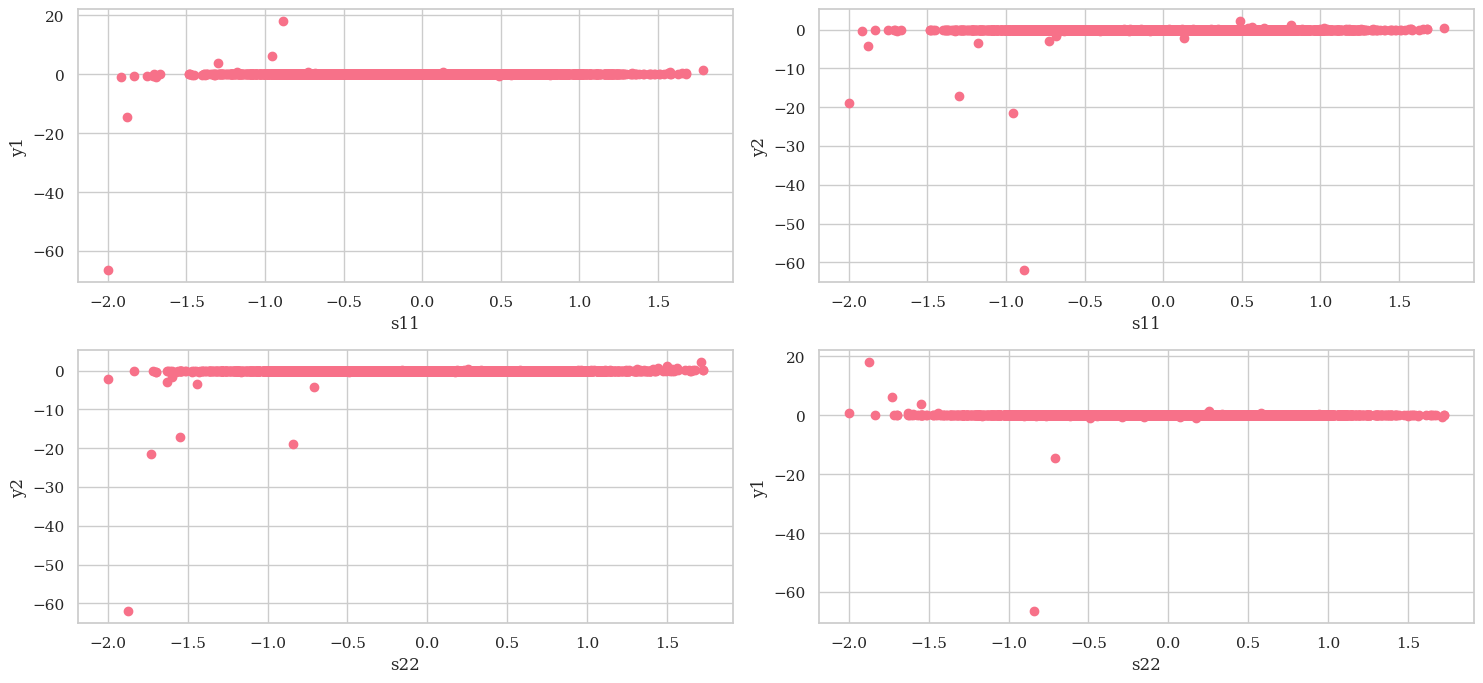

In [ ]:
#plot da recuperação dos sinais

Y1 = y1[0,:].reshape(-1).tolist()
Y2 = y1[1,:].reshape(-1).tolist()

fig,ax = plt.subplots(2,2,figsize=(15,7))

ax[0][0].scatter(s11,Y1)
ax[0][0].set_xlabel('s11')
ax[0][0].set_ylabel('y1')

ax[1][0].scatter(s22,Y2)
ax[1][0].set_xlabel('s22')
ax[1][0].set_ylabel('y2')

ax[1][1].scatter(s22,Y1)
ax[1][1].set_xlabel('s22')
ax[1][1].set_ylabel('y1')

ax[0][1].scatter(s11,Y2)
ax[0][1].set_xlabel('s11')
ax[0][1].set_ylabel('y2')

#plt.xlim(-4, 4)
#plt.ylim(-4, 4)

plt.tight_layout()
plt.show()

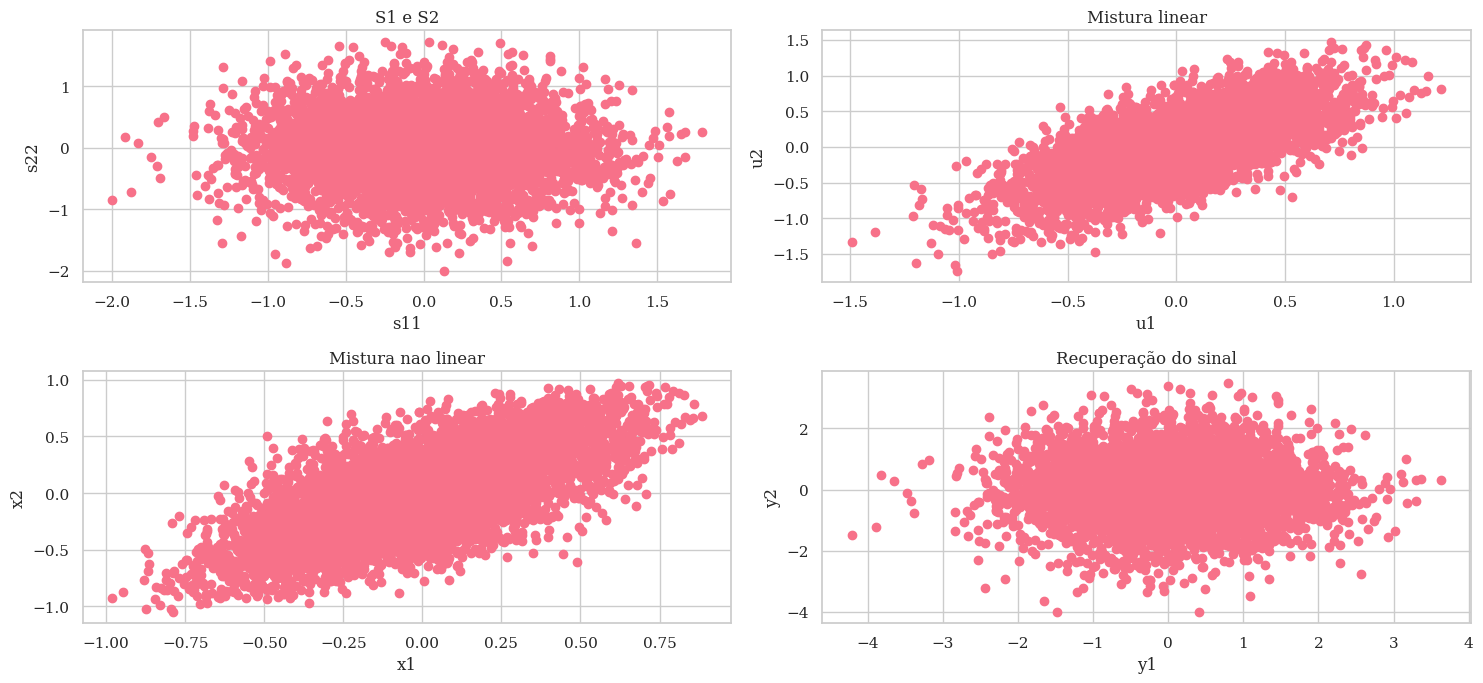

In [ ]:
#plot comparativo

#y1 = z_result[0,:].reshape(-1).tolist()
#y2 = z_result[1,:].reshape(-1).tolist()

fig,ax = plt.subplots(2,2,figsize=(15,7))

ax[0][0].scatter(s11,s22)
ax[0][0].set_xlabel('s11')
ax[0][0].set_ylabel('s22')
ax[0][0].set_title('S1 e S2')

ax[1][0].scatter(x1[0,:].reshape(-1).tolist(),x1[1,:].reshape(-1).tolist())
ax[1][0].set_xlabel('x1')
ax[1][0].set_ylabel('x2')
ax[1][0].set_title('Mistura nao linear')

ax[0][1].scatter(X[0,:].reshape(-1).tolist(),X[1,:].reshape(-1).tolist())
ax[0][1].set_xlabel('u1')
ax[0][1].set_ylabel('u2')
ax[0][1].set_title('Mistura linear')

ax[1][1].scatter(Y1,Y2)
ax[1][1].set_xlabel('y1')
ax[1][1].set_ylabel('y2')
ax[1][1].set_title('Recuperação do sinal')

#plt.xlim(-4, 4)
#plt.ylim(-4, 4)

plt.tight_layout()
plt.show()